In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math

# LOADING THE DATA
# The coordinates of each city are loaded into the list "list" which has for entries [coord1,coord2] for each city.

list=[]
with open("tsp.txt") as file:
    for line in file:
        line = line
        list.append(line)#preprocess line
list.pop(0)
list=[ x.split() for x in list]
list=[[float(x[0]),float(x[1])] for x in list]

print('Number of cities: '+str(len(list)))

Number of cities: 25


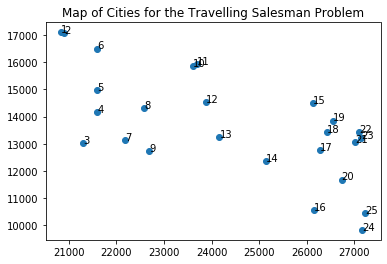

In [2]:
# PLOTTING THE CITIES OF THE TRAVELLING SALESMAN PROBLEM

x_coord=[ i[0] for i in list]
y_coord=[ i[1] for i in list]
labels = range(1,len(list)+1)

fig, ax = plt.subplots()
plt.title(r'Map of Cities for the Travelling Salesman Problem')
ax.scatter(x_coord, y_coord)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x_coord[i], y_coord[i]))

In [3]:
# We see in the graph above that the cities can be grupped into a left and right cluster. Instead of considering
# the 25 cities simultaneously, which would be very computally demaning, we consider the left and right clusters
# and then join them together along the 12-13 segment.

List_Left=list[:13]
List_Right=list[11:]

In [4]:
# USEFULL FUNCTIONS 
# This functions will be used in our code for the travelling salesman problem.

def getbin(m, s=['']):
    # This function produces all possible binary strings of length m. These binary strings will have a 1 or 0
    # indicating the presence or absence of a city in the subset.
    
    # INPUT: The number m indicating the number of bits of the binary string.
    # OUTPUT: A list with all the possible binary strings of length m.
    if m > 0:
        return [
            *getbin(m - 1, [i + '0' for i in s]),
            *getbin(m - 1, [j + '1' for j in s])
        ]
    return s

def String_to_item_list(string):
    # This function  takes the binary string representing the contents of a subset of cities and returns a set with
    # the cities.
    
    # INPUT: A string of 1's and 0's which denotes a subsets's contents. For example "1000101011".
    # OUTPUT: A set containing the indices (starting from 1) where the 1's are located. The first 1 from the left
    # is omitted.
    temp=set()
    for i in range(len(string)):
        if string[i]=='1':
            temp.add(i+1)
    temp.remove(1)
    return temp

def Delete_city_from_string(string,j):
    # This function takes a binary string representing the contents of a subset of cities and removes the city j,
    # which is equivalent to flipping the corresponding entry to 0. Then the integer of the resulting binary string
    # is returned.
    
    # INPUT: A binary string and an integer j.
    # OUTPUT: An integer representing the subset obtained after removing j from the subset represented by the
    # string.
    return int(string[0:j-1]+'0'+string[j:],2)

In [5]:
# CODE FOR COMPUTING THE MINIMUN LENGTH IN THE TRAVELLING SALESMAN PROBLEM

def Minimun_Length_Travelling_Salesman_Problem(List):
    # This function computes the minimun length for the most efficient path in the travelling salesman problem.
    # Here the path is assumed to be closed ended.
    
    # INPUT: A list where each entry corresponds to the coordinates [coord1,coord2] describing the location of
    # each city.
    # OUTPUT: A floating number given by the minimun length path in the travelling salesman problem.

    n=len(List)

    # The city coordinates to be used for the Travelling Salesman Problem are loaded from the input list into a 
    # dictionary called "City_Coord". The keys correspond to an integer number labelling the city and the values
    # in the dictionary are 2-tuples containing the coordinates of each city.
    City_Coord={}
    for i in range(1,1+len(List)):
        City_Coord[i]=np.array(List[i-1])

    # The Euclidean distance between the cities are computed and stored in the dictionary "Distance_between_Cities".
    # The dictionary keys are of the form (i,j) with i,j in [1,2,...,n] where n is the number of cities. 
    Distance_between_Cities={}
    for i in City_Coord.keys():
        for j in City_Coord.keys():
            Distance_between_Cities[i,j]=np.linalg.norm(City_Coord[i]-City_Coord[j])

    # The dictionary S_int_binary has all the subsets of S={1,2,...,n}. As a key, it has an integer value. As value
    # it has an n-bit binary string indicating the presence (1) or absence (0) of a city in the subset.
    Temp=[x for x in getbin(n) if x[0]=='1']
    S_int_binary={}
    for x in Temp:
        S_int_binary[int(x, 2)]=x

    # The dictionary S_by_size contains all subsets of S={1,2,...n} classified by the number of cities in the
    # subset. The keys are integers in 1,...,n and the corresponding values are a list of integers labelling the
    # subsets that contain that number of cities.
    S_by_size={}
    for i in range(1,n+1):
        S_by_size[i]=[int(x, 2) for x in Temp if x.count('1')==i]
    
    # The dictionary S_contents stores the cities contained in each subset of S={1,2,...,n}. The dictionary keys are
    # integers labelling each subset and the values are sets with integers labelling the cities contained. The city 1
    # is omitted in all of this subsets as it is ever-present as the starting point of the algorithm.
    S_contents={}
    for i in S_int_binary.keys():
        S_contents[i]=String_to_item_list(S_int_binary[i])
    
    # This is deleted to save memory
    del Temp
    
    # The base cases for the dynamic programming algorithm are initialized
    A={}
    for i in S_int_binary.keys():
        if i==S_by_size[1][0]:
            A[i,1]=0
        else:
            A[i,1]=float("inf")
            
    # The recursive part of the dynamic programming algorithm is implemented
    for m in range(2,n+1):
        for i in S_by_size[m]:   
            for j in S_contents[i]:
                A[i,j]=min([A[Delete_city_from_string(S_int_binary[i],j),k]+Distance_between_Cities[k,j] for k in S_contents[i].union({1}) if k!=j])
            
    return min([A[S_by_size[n][0],j]+Distance_between_Cities[j,1] for j in range(2,n+1)])

In [6]:
# SOLUTION TO THE EXERCISE USING THE CODE ABOVE
# Instead of computing the minimun length for the problem containin the 25 cities, which would be very consuming,
# we split the problem into the left and right clusters. After computing the length travelled in each, we have to
# substract twice (to avoid overcounting) the edge that they share. As requested by the problem, the answer is
# rounded to the lowest integer value.
math.floor(Minimun_Length_Travelling_Salesman_Problem(List_Left)+Minimun_Length_Travelling_Salesman_Problem(List_Right)-2*np.linalg.norm(np.array(List_Right[0])-np.array(List_Right[1])))

26442